(howto-analysis)=
# Analysis helpers

(howto-analysis-has-calibration-points)=
## Calibration points autodetection

In this ideal scenario, if the datapoints indicated by the indices correspond to the
calibration points, then these points will be located on the extremities of a
"segment" on the IQ plane.

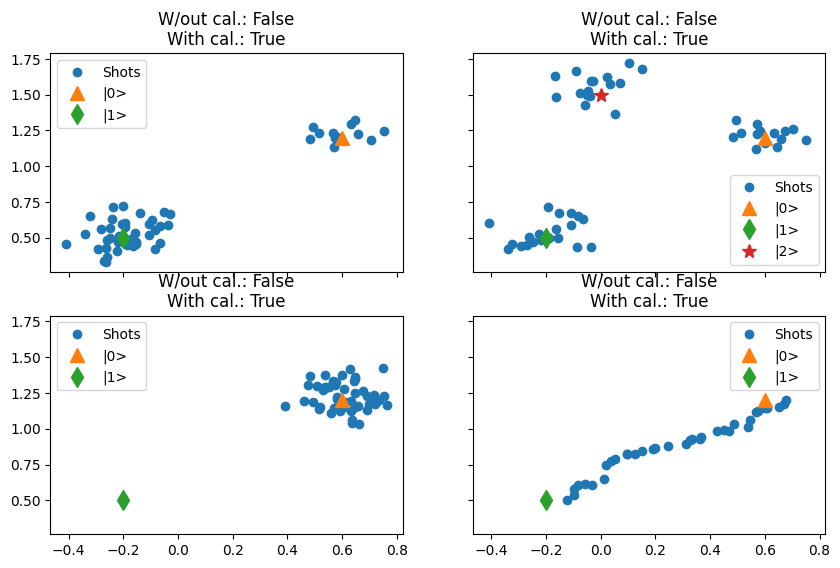

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from quantify.analysis.calibration import has_calibration_points
from quantify.utilities.examples_support import mk_iq_shots


def _with_cal(data_):
    return np.concatenate((data_, (center_0, center_1)))


def _print(ax_, data_) -> None:
    ax_.set_title(
        f"W/out cal.: {has_calibration_points(data_)}\n"
        f"With cal.: {has_calibration_points(_with_cal(data_))}"
    )


fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
    2, 2, figsize=(10, 10 / 1.6), sharex=True, sharey=True
)

center_0, center_1, center_2 = 0.6 + 1.2j, -0.2 + 0.5j, 0 + 1.5j
NUM_SHOTS = 50

data = mk_iq_shots(
    NUM_SHOTS,
    sigmas=[0.1] * 2,
    centers=(center_0, center_1),
    probabilities=[0.3, 1 - 0.3],
)

ax0.plot(data.real, data.imag, "o", label="Shots")
_print(ax0, data)

data = mk_iq_shots(
    NUM_SHOTS,
    sigmas=[0.1] * 3,
    centers=(center_0, center_1, center_2),
    probabilities=[0.35, 0.35, 1 - 0.35 - 0.35],
)
ax1.plot(data.real, data.imag, "o", label="Shots")
_print(ax1, data)

data = mk_iq_shots(
    NUM_SHOTS,
    sigmas=[0.1],
    centers=(center_0,),
    probabilities=[1],
)
ax2.plot(data.real, data.imag, "o", label="Shots")
_print(ax2, data)

data = np.fromiter(
    (
        mk_iq_shots(
            NUM_SHOTS * 2,
            sigmas=[0.5] * 2,
            centers=(center_0, center_1),
            probabilities=[prob, 1 - prob],
        ).mean()
        for prob in np.linspace(0, 1, 35)
    ),
    dtype=complex,
)
ax3.plot(data.real, data.imag, "o", label="Shots")
_print(ax3, data)

for i, ax in enumerate(fig.axes):
    ax.plot(center_0.real, center_0.imag, "^", label="|0>", markersize=10)
    ax.plot(center_1.real, center_1.imag, "d", label="|1>", markersize=10)
    if i == 1:
        ax.plot(center_2.real, center_2.imag, "*", label="|2>", markersize=10)
    ax.legend()